# Omnimbus Law Topic Modelling Analysis


In [3]:
#Import library yang dibutuhkan
import re, string, unicodedata #modul regular expression
import nltk
from nltk import word_tokenize, sent_tokenize #Paket ini membagi teks input menjadi kata-kata.,
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 01 Data Acquisition

In [4]:
#Download dataset di bawah ini
!wget https://docs.google.com/spreadsheets/d/1OvKGTnyE3LnP-E6dtwOSLa1IK-ZdrR_i/edit#gid=2089333632

--2024-10-30 15:35:10--  https://docs.google.com/spreadsheets/d/1OvKGTnyE3LnP-E6dtwOSLa1IK-ZdrR_i/edit
Resolving docs.google.com (docs.google.com)... 142.250.101.102, 142.250.101.100, 142.250.101.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.101.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘edit.1’

edit.1                  [ <=>                ] 281.29K  --.-KB/s    in 0.09s   

2024-10-30 15:35:10 (3.17 MB/s) - ‘edit.1’ saved [288043]



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#reading the dataset
data= pd.read_excel('/content/drive/MyDrive/DS Project/data_omnibuslaw.xlsx')
data.head(5)

,Text
0,Yukkk ah bersama Omnibus Law kita ikutan menol...
1,Yuk kita sukseskan RUU Omnibus Law untuk Indon...
2,yuk kita dukung #OmnibusLaw
3,Yuk gaes.. be smart. Bisa kok kritisi Omnibus ...
4,Yuk Dukung Omnibus Law


# 02 Text Preprocessing

## Case Folding

In [7]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
    text = text.lower()                               # Mengubah teks menjadi lower case
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
    text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
    text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
    text = text.strip()
    return text

In [8]:
raw_sample = data['Text'].iloc[100]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)

Raw data	:  T4gar kita hari ini #CovidGanasDemoDilarangKeras unk mengajak masyarakat agar tdk ikut demo &amp


Case folding	:  tgar kita hari ini covidganasdemodilarangkeras unk mengajak masyarakat agar tdk ikut demo amp


## Filtering (Stopword Removal)

In [9]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
len(stopwords_ind)

758

In [11]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [12]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['with', 'these', 'conditions' ,'the', 'to', 'di', 'dan', 'and', 'an', 'so', 'far', 'telah', 'yg', 'sm', 'ah']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [13]:
raw_sample = data['Text'].iloc[30]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal\t: ', stopword_removal)

Raw data	:  Upaya merampungkan pembahasan omnibuslaw RUU cipta kerja diharapkan segera terselesai. Dimasa pandemi COVID 19 ini kebijakan yang sederhana, tepat sasaran sangat penting. Hadapi tantangan dinamika ekonomi global yang kompleks. #OmnibusLawSolusiPekerja


Case folding	:  upaya merampungkan pembahasan omnibuslaw ruu cipta kerja diharapkan segera terselesai dimasa pandemi covid  ini kebijakan yang sederhana tepat sasaran sangat penting hadapi tantangan dinamika ekonomi global yang kompleks omnibuslawsolusipekerja


Stopword removal	:  upaya merampungkan pembahasan omnibuslaw ruu cipta kerja diharapkan terselesai dimasa pandemi covid kebijakan sederhana sasaran hadapi tantangan dinamika ekonomi global kompleks omnibuslawsolusipekerja


## Stemming

In [14]:
! pip install sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


In [15]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text

In [16]:
raw_sample       = data['Text'].iloc[15]
case_folding     = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming    = stemming(stopword_removal)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal\t: ', stopword_removal)
print('\n\nStemming\t: ', text_stemming)

Raw data	:  Warga Indonesia Telah Siap Dengan Kehidupan New Normal. . . #HTICoronaFPImusuhRakyat #staysafe #omnibuslaw #RUUCiptaKerja #KawalSahkanOmnibuslaw


Case folding	:  warga indonesia telah siap dengan kehidupan new normal   hticoronafpimusuhrakyat staysafe omnibuslaw ruuciptakerja kawalsahkanomnibuslaw


Stopword removal	:  warga indonesia kehidupan new normal hticoronafpimusuhrakyat staysafe omnibuslaw ruuciptakerja kawalsahkanomnibuslaw


Stemming	:  warga indonesia hidup new normal hticoronafpimusuhrakyat staysafe omnibuslaw ruuciptakerja kawalsahkanomnibuslaw


## Text Preprocessing Pipeline

In [17]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
    text = casefolding(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [18]:
!pip install swifter #Install swifter. digunakan untuk meningkatkan kecepatan proses pandas
import swifter

In [19]:
#%%time
data['clean_article'] = data['Text'].swifter.apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

In [20]:
data

,Text,clean_article
0,Yukkk ah bersama Omnibus Law kita ikutan menol...,yukkk omnibus law ikut tolak demo gmn kelar co...
1,Yuk kita sukseskan RUU Omnibus Law untuk Indon...,yuk sukses ruu omnibus law indonesia
2,yuk kita dukung #OmnibusLaw,yuk dukung omnibuslaw
3,Yuk gaes.. be smart. Bisa kok kritisi Omnibus ...,yuk gaes be smart kritisi omnibus law aksi dem...
4,Yuk Dukung Omnibus Law,yuk dukung omnibus law
...,...,...
3995,‚ÄúOmnibus Law merupakan cerminan semakin rend...,omnibus law cermin rendah komitmen perintah li...
3996,‚ÄúOmnibus Law harus segera dibatalkan. Pertam...,omnibus law batal ruu produk bijak proses pnyu...
3997,‚ÄúDewan Perwakilan Rakyat‚Äù Katanya sebagai ...,dewan wakil rakyat salur aspirasi rakyat juta ...
3998,".... ,mengancam ruang hidup warga/umat dan men...",ancam ruang hidup wargaumat abai prinsip adil ...


In [21]:
#save data_preprocessing
data.to_excel("dataset_preprocessing_news.xlsx")

# 03 Feature Extraction

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect =TfidfVectorizer(max_features=1000)
vect_text=vect.fit_transform(data['clean_article'])

In [23]:
#Menampilkan vocabulary dari TF-IDF
vect.vocabulary_

{'omnibus': 616,
 'law': 479,
 'ikut': 317,
 'tolak': 924,
 'demo': 185,
 'gmn': 274,
 'klo': 435,
 'mending': 544,
 'rumah': 768,
 'aja': 15,
 'dukungobltolakaksidemo': 220,
 'yuk': 995,
 'ruu': 772,
 'indonesia': 324,
 'dukung': 218,
 'omnibuslaw': 618,
 'aksi': 21,
 'bahaya': 71,
 'krisis': 450,
 'ekonomi': 225,
 'susah': 866,
 'kerja': 422,
 'rugi': 767,
 'perintah': 685,
 'dpr': 210,
 'ri': 762,
 'pikir': 694,
 'bahas': 69,
 'pandemi': 650,
 'ga': 245,
 'hak': 286,
 'its': 342,
 'outsourcing': 637,
 'khawatir': 428,
 'omnibuslawciptaker': 620,
 'ciptakerja': 154,
 'ciptaker': 153,
 'umkm': 956,
 'yangpastipastiaja': 992,
 'dukungomnibuslaw': 221,
 'baik': 72,
 'main': 517,
 'corona': 158,
 'waspadademotularkancovid': 984,
 'ra': 731,
 'sah': 781,
 'ruuciptakerja': 774,
 'indonesiamaju': 328,
 'waspada': 983,
 'korban': 444,
 'buruh': 131,
 'tengah': 899,
 'covid': 159,
 'fakta': 232,
 'cipta': 152,
 'untung': 962,
 'kuat': 456,
 'jamin': 353,
 'sejahtera': 804,
 'busuk': 134,
 'ma

In [24]:
#Lihat data tabular yang menggunakan metode TF-IDF
#Data ini siap untuk dimasukkan dalam proses machine learning

x1 = vect.transform(data['clean_article']).toarray()
data_tabular_tf_idf= pd.DataFrame(x1,columns=vect.get_feature_names_out())
data_tabular_tf_idf

,abai,ada,adat,add,adil,adlh,administrasi,adu,agam,agama,...,ya,yaa,yangpastipastiaja,yogyakarta,youtube,yuk,zahrashyfa,zalim,zeenvf,zona
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.775846,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.812565,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.308593,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.815146,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3996,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3997,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3998,0.415398,0.0,0.0,0.0,0.365947,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# 04 LDA Model

In [25]:
#Algoritme LDA (Latent Diriclet Allocation)
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=5,learning_method='online',random_state=0,max_iter=10)

lda_top=lda_model.fit_transform(vect_text)

In [26]:
#Melihat probabilitas dokumen terhadap topik
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  26.159777716398132 %
Topic  1 :  5.104891057532825 %
Topic  2 :  5.163676928067969 %
Topic  3 :  5.215626528461152 %
Topic  4 :  58.35602776953993 %


In [27]:
data_cluster = []
for n in range(lda_top.shape[0]):
    topic_most_pr = lda_top[n].argmax()
    data_cluster.append(topic_most_pr)
    print("doc: {} topic: {}\n".format(n,topic_most_pr))
data ['cluster'] = data_cluster

Streaming output truncated to the last 5000 lines.
doc: 1500 topic: 4

doc: 1501 topic: 2

doc: 1502 topic: 2

doc: 1503 topic: 2

doc: 1504 topic: 2

doc: 1505 topic: 2

doc: 1506 topic: 2

doc: 1507 topic: 2

doc: 1508 topic: 2

doc: 1509 topic: 2

doc: 1510 topic: 2

doc: 1511 topic: 2

doc: 1512 topic: 2

doc: 1513 topic: 3

doc: 1514 topic: 2

doc: 1515 topic: 1

doc: 1516 topic: 1

doc: 1517 topic: 1

doc: 1518 topic: 1

doc: 1519 topic: 1

doc: 1520 topic: 2

doc: 1521 topic: 3

doc: 1522 topic: 2

doc: 1523 topic: 1

doc: 1524 topic: 2

doc: 1525 topic: 1

doc: 1526 topic: 3

doc: 1527 topic: 4

doc: 1528 topic: 2

doc: 1529 topic: 0

doc: 1530 topic: 1

doc: 1531 topic: 2

doc: 1532 topic: 3

doc: 1533 topic: 2

doc: 1534 topic: 1

doc: 1535 topic: 4

doc: 1536 topic: 3

doc: 1537 topic: 1

doc: 1538 topic: 1

doc: 1539 topic: 1

doc: 1540 topic: 3

doc: 1541 topic: 3

doc: 1542 topic: 3

doc: 1543 topic: 3

doc: 1544 topic: 3

doc: 1545 topic: 3

doc: 1546 topic: 3

doc: 1547

In [29]:
vocab = vect.get_feature_names_out()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
omnibuslaw kerja lindung tani gagal cipta law omnibus juli stopdemowaspadacovid 

Topic 1: 
kerja negara omnibuslaw jamin bijak pasal perintah hak law omnibus 

Topic 2: 
omnibus law dukung tolak ruu kerja cipta ekonomi indonesia omnibuslaw 

Topic 3: 
usaha buka mudah milenial law omnibus pandemi omnibuslaw fokus perintah 

Topic 4: 
gagalkanomnibuslaw atasiviruscabutomnibus omnibus tolakomnibuslaw law tolak ruu rakyat dpr omnibuslaw 



**INSIGHT**
- topic 0 : politik, demonstrasi
- topic 1 : sosial, hukum
- topic 2 : hukum, kesehatan, sosial
- topic 3 : ekonomi
- topic 4 : sosial ekonomi

In [30]:
vocab = vect.get_feature_names_out()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t,end=" ")
    print("\n")

Topic 0: 
('omnibuslaw', 52.930711492410154) ('kerja', 51.91725557279381) ('lindung', 33.10573965206891) ('tani', 29.634530218115533) ('gagal', 29.423268298837055) ('cipta', 25.830002758341607) ('law', 25.268106643784385) ('omnibus', 25.121900392858944) ('juli', 22.2251155290108) ('stopdemowaspadacovid', 19.247844781740927) 

Topic 1: 
('kerja', 62.41336454650747) ('negara', 37.541858801231875) ('omnibuslaw', 34.0565083151008) ('jamin', 32.72530133168174) ('bijak', 31.794869088019137) ('pasal', 26.059425905312253) ('perintah', 25.98834875949699) ('hak', 23.716137700678196) ('law', 23.402946151389393) ('omnibus', 23.236238356806634) 

Topic 2: 
('omnibus', 140.0522751012486) ('law', 138.92251041346958) ('dukung', 111.71355839818733) ('tolak', 85.19625389036017) ('ruu', 72.00977881321873) ('kerja', 71.8808134591335) ('cipta', 71.34807218936889) ('ekonomi', 60.856641464983944) ('indonesia', 59.60458891626667) ('omnibuslaw', 56.0303781927522) 

Topic 3: 
('usaha', 46.52349638714395) ('buka

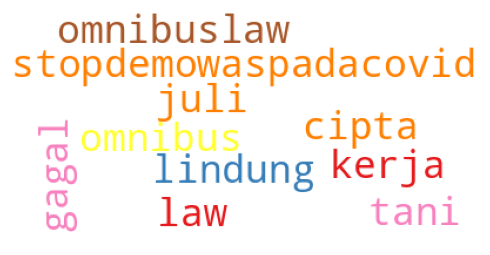

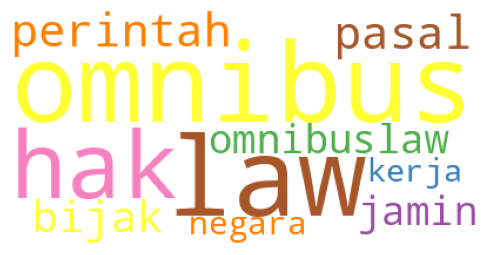

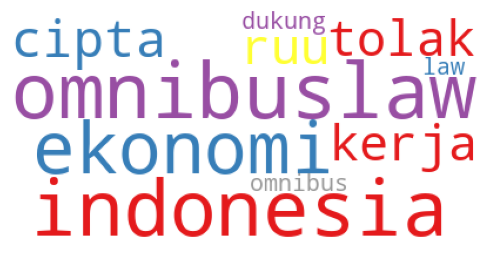

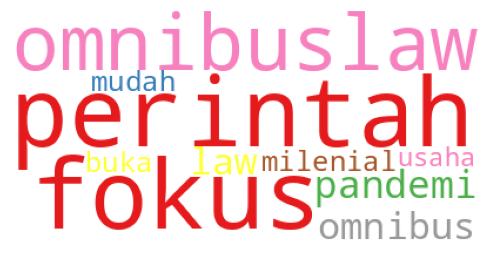

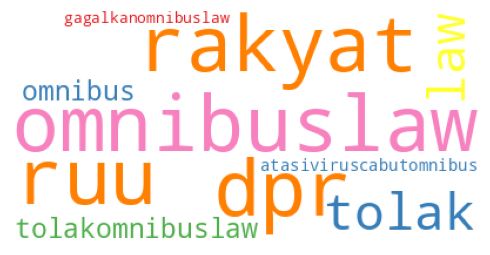

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


for index, topic in enumerate(lda_model.components_):
    tmps = [vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    text = " ".join(str(topik) for topik in tmps)
    wordcloud = WordCloud(max_words=10,colormap='Set1', background_color="white").generate(text)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()


In [33]:
data

,Text,clean_article,cluster
0,Yukkk ah bersama Omnibus Law kita ikutan menol...,yukkk omnibus law ikut tolak demo gmn kelar co...,4
1,Yuk kita sukseskan RUU Omnibus Law untuk Indon...,yuk sukses ruu omnibus law indonesia,2
2,yuk kita dukung #OmnibusLaw,yuk dukung omnibuslaw,2
3,Yuk gaes.. be smart. Bisa kok kritisi Omnibus ...,yuk gaes be smart kritisi omnibus law aksi dem...,2
4,Yuk Dukung Omnibus Law,yuk dukung omnibus law,2
...,...,...,...
3995,‚ÄúOmnibus Law merupakan cerminan semakin rend...,omnibus law cermin rendah komitmen perintah li...,1
3996,‚ÄúOmnibus Law harus segera dibatalkan. Pertam...,omnibus law batal ruu produk bijak proses pnyu...,1
3997,‚ÄúDewan Perwakilan Rakyat‚Äù Katanya sebagai ...,dewan wakil rakyat salur aspirasi rakyat juta ...,4
3998,".... ,mengancam ruang hidup warga/umat dan men...",ancam ruang hidup wargaumat abai prinsip adil ...,1
